In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
data = load_digits(return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [4]:
pixel_values.shape, targets.shape

((1797, 64), (1797,))

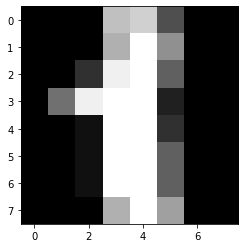

In [5]:
single_image = pixel_values[1, :].reshape(8,8)
plt.imshow(single_image, cmap='gray')

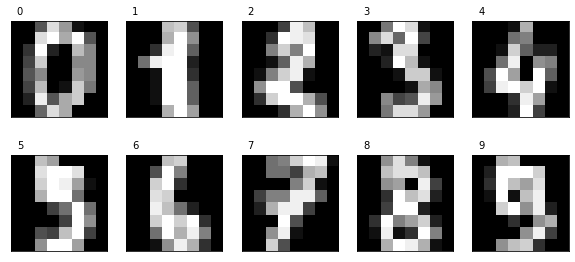

In [6]:
n_col, n_row = 5, 2
def print_digits(images, y, max_n=10):
    # Set Up the Figure Size in Inches
    fig = plt.figure(figsize = (2.*n_col, 2.26*n_row))
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i+1, xticks=[], yticks=[])
        p.imshow(images[i].reshape(8,8), cmap='gray', interpolation='nearest')
        p.text(0, -1, str(y[i]))
        i += 1
print_digits(pixel_values, targets, max_n=10)

In [7]:
X_train, X_test_ori, y_train, y_test_ori = train_test_split(pixel_values, targets, test_size=0.20, random_state=2020)

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred_1 = log_reg.predict(X_test_ori)

In [10]:
print(f"Accuracy of Model_01: {accuracy_score(y_test_ori, y_pred_1)*100:0.2f}%")

Accuracy of Model_01: 96.94%


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2020)
transformed_data = pca.fit_transform(pixel_values)

In [12]:
pca_df = pd.DataFrame(np.column_stack((transformed_data, targets)), columns=['x','y','targets'])
pca_df.loc[:,"targets"] = pca_df.targets.astype(int)

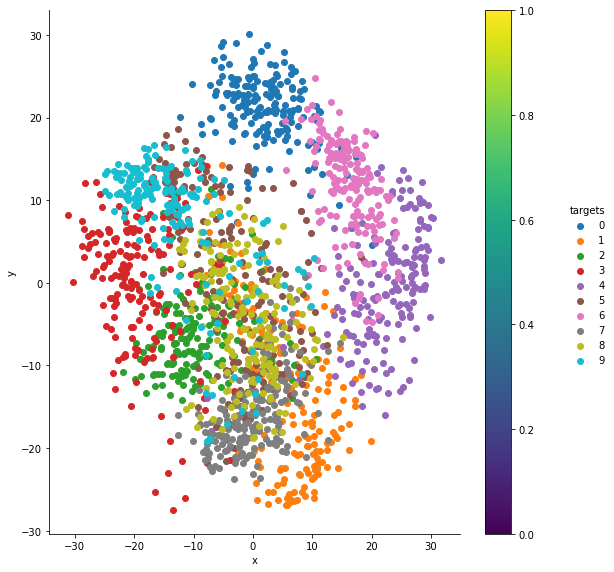

In [13]:
grid = sns.FacetGrid(pca_df, hue='targets', size=8)
grid.map(plt.scatter, "x", "y").add_legend()
plt.colorbar();

In [14]:
pca = PCA(n_components=30, random_state=2020)
transformed_data = pca.fit_transform(pixel_values)

In [15]:
print(f"{pca.n_components} components explains {pca.explained_variance_ratio_.sum()*100:0.2f}% of the Variance")

30 components explains 95.91% of the Variance


In [16]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, targets, test_size=0.20, random_state=2020)

In [17]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred_2 = log_reg.predict(X_test)

In [19]:
print(f"Accuracy of Model_02: {accuracy_score(y_test, y_pred_2)*100:0.2f}%")

Accuracy of Model_02: 96.11%


In [20]:
# Accuracy of the Model is nearly same, only difference is of 0.83% less than the previous.

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_2)

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  1,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 1,  1,  0,  0,  1,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  3, 31]], dtype=int64)

In [22]:
np.unique(y_test == y_pred_2, return_counts=True)

(array([False,  True]), array([ 14, 346], dtype=int64))

In [23]:
false_idx = np.argwhere(y_test != y_pred_2)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_2))
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.97      0.91      0.94        35
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        36
           4       0.95      0.98      0.96        42
           5       1.00      0.95      0.97        37
           6       0.97      1.00      0.99        36
           7       0.97      1.00      0.99        37
           8       0.87      0.90      0.88        29
           9       0.91      0.89      0.90        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [25]:
transformed_data.shape

(1797, 30)

In [26]:
X_test[false_idx].shape

(14, 1, 30)

In [27]:
False_test = X_test[false_idx, :]

In [28]:
False_test = False_test.reshape(-1, 5, 6)

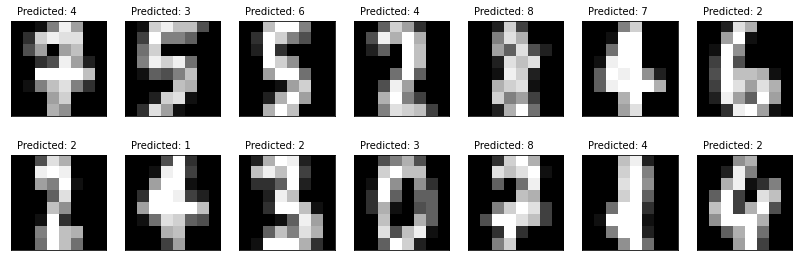

In [29]:
n_col, n_row = 7, 2
def print_digits(images, y, max_n=14):
    # Set Up the Figure Size in Inches
    fig = plt.figure(figsize = (2.*n_col, 2.26*n_row))
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i+1, xticks=[], yticks=[])
        p.imshow(images[i].reshape(8,8), cmap='gray', interpolation='nearest')
        p.text(0, -1, f"Predicted: {str(y_test[i])}")
        i += 1
print_digits(pixel_values[false_idx], targets[false_idx], max_n=14)